In [11]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 15 19:43:04 2019

Updated on Wed Jan 29 10:18:09 2020

@author: created by Sowmya Myneni and updated by Dijiang Huang

Edited by Kai Chi on Thu, July 6, 2023
"""

########################################
# Part 1 - Data Pre-Processing
#######################################

# To load a dataset file in Python, you can use Pandas. Import pandas using the line below
import pandas as pd
# Import numpy to perform operations on the dataset
import numpy as np

# Variable Setup
# Available datasets: KDDTrain+.txt, KDDTest+.txt, etc. More read Data Set Introduction.html within the NSL-KDD dataset folder
# Type the training dataset file name in ''
TrainingDataPath='NSL-KDD/'
TrainingData='KDDTrain+.txt'
# Batch Size
BatchSize=10
# Epohe Size
NumEpoch=10


# Import dataset.
# Dataset is given in TraningData variable You can replace it with the file 
# path such as “C:\Users\...\dataset.csv’. 
# The file can be a .txt as well. 
# If the dataset file has header, then keep header=0 otherwise use header=none
# reference: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
dataset = pd.read_csv(TrainingDataPath+TrainingData, header=None)
X = dataset.iloc[:, 0:-2].values
label_column = dataset.iloc[:, -2].values
y = []
for i in range(len(label_column)):
    if label_column[i] == 'normal':
        y.append(0)
    else:
        y.append(1)

# Convert ist to array
y = np.array(y)

# Encoding categorical data (convert letters/words in numbers)
# Reference: https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
# The following code work without warning in Python 3.6 or older. Newer versions suggest to use ColumnTransformer
'''
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 2] = le.fit_transform(X[:, 2])
X[:, 3] = le.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [1, 2, 3])
X = onehotencoder.fit_transform(X).toarray()
'''
# The following code work Python 3.7 or newer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [1,2,3])],    # The column numbers to be transformed ([1, 2, 3] represents three columns to be transferred)
    remainder='passthrough'                         # Leave the rest of the columns untouched
)
X = np.array(ct.fit_transform(X), dtype=float)

# Splitting the dataset into the Training set and Test set (75% of data are used for training)
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Perform feature scaling. For ANN you can use StandardScaler, for RNNs recommended is 
# MinMaxScaler. 
# referece: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Scaling to the range [0,1]
X_test = sc.fit_transform(X_test)

print(dataset.head(1))
print(X_train[0])
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)



   0    1         2   3    4   5   6   7   8   9   ...    33    34    35   36  \
0   0  tcp  ftp_data  SF  491   0   0   0   0   0  ...  0.17  0.03  0.17  0.0   

    37   38    39   40      41  42  
0  0.0  0.0  0.05  0.0  normal  20  

[1 rows x 43 columns]
[-0.26638275  0.47661239 -0.36726405 -0.03907013 -0.02391406 -0.08348906
 -0.004601   -0.08732427 -0.07410481 -0.07617051 -0.06650239 -0.06666277
 -0.06438176 -0.06626111 -0.06714165 -0.27775928 -0.05991961 -0.1949719
 -0.15880297 -0.06270256 -0.06158693 -0.12008236 -0.11903497 -0.23961491
 -0.0649594  -0.00325338 -0.06009726  1.45583557 -0.00325338 -0.06528722
  0.         -0.07160882 -0.07460855 -0.05920374 -0.04842136 -0.05615575
 -0.06167345 -0.05802188 -0.05947318 -0.05983058 -0.05792998 -0.05273343
 -0.05191989 -0.05363407 -0.071758   -0.04842136 -0.03768712 -0.18943547
 -0.004601   -0.02541777 -0.04708541 -0.02254568 -0.45703661 -0.0086079
 -0.02583137 -0.02499735 -0.02301083 -0.24761134 -0.04536068 -0.050465
 -0.05529572 -

In [3]:
########################################
# Part 2: Building FNN
#######################################

# Importing the Keras libraries and packages
#import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
# Reference: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
classifier = Sequential()

# Adding the input layer and the first hidden layer, 6 nodes, input_dim specifies the number of variables
# rectified linear unit activation function relu, reference: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = len(X_train[0])))

# Adding the second hidden layer, 6 nodes
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer, 1 node, 
# sigmoid on the output layer is to ensure the network output is between 0 and 1
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN, 
# Gradient descent algorithm “adam“, Reference: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
# This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“, Reference: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
# Train the model so that it learns a good (or good enough) mapping of rows of input data to the output classification.
# add verbose=0 to turn off the progress report during the training
# To run the whole training dataset as one Batch, assign batch size: BatchSize=X_train.shape[0]
classifierHistory = classifier.fit(X_train, y_train, batch_size = BatchSize, epochs = NumEpoch)

# evaluate the keras model for the provided model and dataset
loss, accuracy = classifier.evaluate(X_train, y_train)
print('Print the loss and the accuracy of the model on the dataset')
print('Loss [0,1]: %.4f' % (loss), 'Accuracy [0,1]: %.4f' % (accuracy))

Epoch 1/10
9448/9448 [==============================] - 11s 1ms/step - loss: 0.0691 - accuracy: 0.9729
Epoch 2/10
9448/9448 [==============================] - 11s 1ms/step - loss: 0.0330 - accuracy: 0.9872
Epoch 3/10
9448/9448 [==============================] - 15s 2ms/step - loss: 0.0278 - accuracy: 0.9900
Epoch 4/10
9448/9448 [==============================] - 14s 1ms/step - loss: 0.0254 - accuracy: 0.9911
Epoch 5/10
9448/9448 [==============================] - 11s 1ms/step - loss: 0.0237 - accuracy: 0.9917
Epoch 6/10
9448/9448 [==============================] - 11s 1ms/step - loss: 0.0243 - accuracy: 0.9921
Epoch 7/10
9448/9448 [==============================] - 13s 1ms/step - loss: 0.0233 - accuracy: 0.9923
Epoch 8/10
9448/9448 [==============================] - 14s 1ms/step - loss: 0.0218 - accuracy: 0.9926
Epoch 9/10
9448/9448 [==============================] - 14s 1ms/step - loss: 0.0211 - accuracy: 0.9928
Epoch 10/10
2953/2953 [==============================] - 3s 1ms/step - lo

In [4]:
########################################
# Part 3 - Making predictions and evaluating the model
#######################################

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.9)   # y_pred is 0 if less than 0.9 or equal to 0.9, y_pred is 1 if it is greater than 0.9
# summarize the first 5 cases
#for i in range(5):
#	print('%s => %d (expected %d)' % (X_test[i].tolist(), y_pred[i], y_test[i]))

# Making the Confusion Matrix
# [TN, FP ]
# [FN, TP ]
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Print the Confusion Matrix:')
print('[ TN, FP ]')
print('[ FN, TP ]=')
print(cm)
print('Accurracy = %f' % accuracy_score(y_test, y_pred))
print('Precision = %f' % precision_score(y_test, y_pred))
print('Recall = %f' % recall_score(y_test, y_pred))

Print the Confusion Matrix:
[ TN, FP ]
[ FN, TP ]=
[[16803    23]
 [  664 14004]]
Accurracy = 0.978186
Precision = 0.998360
Recall = 0.954731


Plot the accuracy


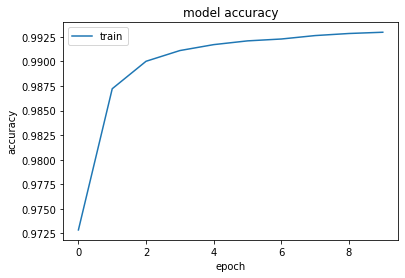

Plot the loss


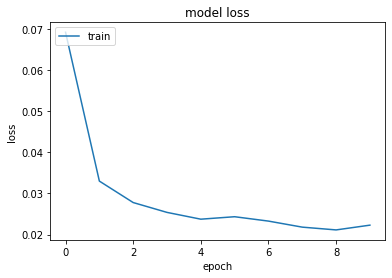

In [5]:
########################################
# Part 4 - Visualizing
#######################################

# Import matplot lib libraries for plotting the figures. 
import matplotlib.pyplot as plt

# You can plot the accuracy
print('Plot the accuracy')
# Keras 2.2.4 recognizes 'acc' and 2.3.1 recognizes 'accuracy'
# use the command python -c 'import keras; print(keras.__version__)' on MAC or Linux to check Keras' version
plt.plot(classifierHistory.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.savefig('accuracy_sample.png')
plt.show()

# You can plot history for loss
print('Plot the loss')
plt.plot(classifierHistory.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.savefig('loss_sample.png')
plt.show()
